# transfer learning

## pre-training -> fine-tuning -> inference

<img src='https://www.researchgate.net/publication/339895075/figure/fig3/AS:932889080385536@1599429497418/Traditional-ML-versus-Transfer-Learning-versus-Meta-Learning.png'/>

**transfer learning**: transfer of knowledge from a general language understanding to a specific task or domain. three phases: pretraining, fine-tuning, and inference

Pre-training: 

- pretrain once, scale up

- expensive computation on multiple GPUs.

- unsupervised learning: cheap data from language modelling.

    e.g., causal language modelling (CLM), masked language modelling (MLM), next sentence prediction (NSP), span masking, Span Boundary Objective (SBO), span corruption. 

- The model is trained on a large corpus for general language understanding (grammar, semantics, discourse, etc) and learn language representations. 

- model acquire knowledge about grammar, semantics, and various patterns in language. 


Fine-tuning: 

- fine-tune many times

- cheap computation on a single GPU

- supervised learning: expensive data with human-curated labels

- The pretrained model is trained on a smaller, task-specific dataset

- adapted on tasks focus on specific domains or problems

Inference (**in-context learning**): 

- After pre-training and fine-tuning, the model is used to perform tasks **using examples provided within its context** without gradient updates 

- methods: **zero-shot/one-shot/few-shot learning, prompt engineering**

## pretrianed word embeddings vs. pretrianed whole models

pretrained word embeddings without context

- type: word2vec, GloVe

- Most of the parameters in whole model are 
randomly initialized

- cons: The training data for 
downstream task must be sufficient to teach all contextual aspects of language.

    

pretrained whole models: 

- **architecture type: decoder, encoder, encoder-decoder**

- all parameters in whole model are initialized via pretraining

- prons: effective at building strong: 

    - representations of language

    - Probability distributions over language that 
we can sample from for downstream task

|      | Pretrained Encoder | Pretrained Encoder-Decoder | Pretrained Decoder |
|------|--------------------|----------------------------|--------------------|
| Architecture | bidirectional encoder (attention or LSTM) | bidirectional encoder + encoder-decoder attention + autoregressive decoder | autoregressive decoder |
| Pretraining Objective | masked language modelling (fully visible masking) | autoregressive language modelling or reconstruction | autoregressive language modelling (causal masking) |
| Input | Full token-masked text sequence | encoder: source text sequence or span-masked sequence <br> decoder: [BOS] token | prompt |
| Output | Predictions for masked tokens (all at once)| target text sequence or predictions for masked spans | Next token in sequence  (one token at a time)  |
| Processing             | Parallel| Parallel input and Sequential output| Sequential    |
| dependency                | Bidirectional context. before and after the target token.                      | Bidirectional context| Unidirectional context. before the target token.              |
| Task | Classification: Sentiment Analysis, Named Entity Recognition |  close-ended generation (low-entropy): Translation, Summarization, Task-driven Dialog, Reading Comprehension QA | open-ended generation (high-entropy): Story Generation, ChitChat |
| Classic Models | BERT, RoBERTa, SpanBERT | T5, BART | GPT-3 |


## encoder

classic pretrained encoders:

- BERT (Bidirectional Encoder Representations from Transformers)

- RoBERTa (Robustly Optimized BERT Pretraining Approach)

- SpanBERT

pretraining objective: fully-visible masking, e.g., masked language modelling (MLM) (BERT), span masking (SpanBERT). (see BERT notebook for detail)

**Limitations of pretrained encoders**: can't used for **generation** task because of architecture and training objective.

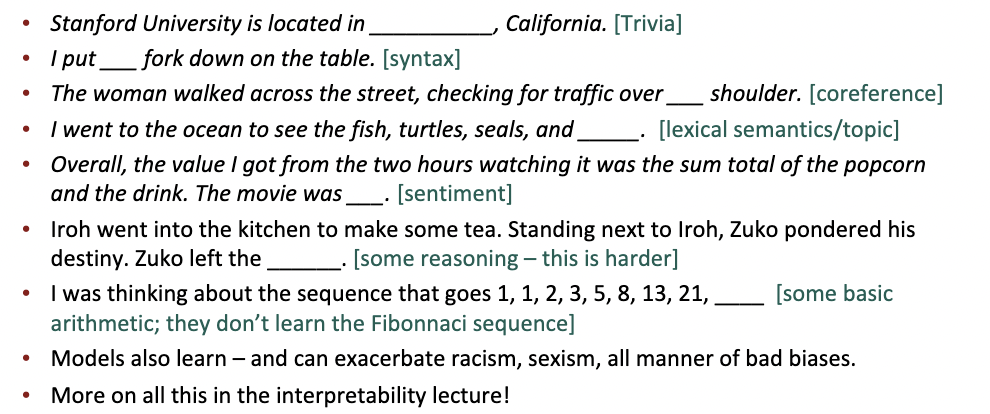

## encoder-decoder

Classic pretrained encoder-decoder

- T5 (Text-to-Text Transfer Transformer)

- BART (Bidirectional and Auto-Regressive Transformers)

- Seq2Seq BERT (Sequence-to-Sequence BERT)

- MARGE (Massively Multilingual, Massively Multitask, and Massively Data-Augmented Pretraining)

pretraining objective: 

- **fully-visible masking in encoder and encoder-decoder attention, and causal masking in decoder**.

- encoder: capture bidirectional context

    - input: a prefix of input text (e.g., "translate English to French:") or corrupted input text sequence (T5)

    - output: a sequence of continuous-valued vectors, where each vector represents a token in the input sequence.

- decoder: predict the next word in a sequence given the previous words.

    - input: context vectors from encoder. 
    
        In some cases, task-specific prefixes, or previous tokens generated by the decoder, or a special start-of-sentence (SOS) token to indicate the beginning of the output generation process also be provided as input.

    - output: output text sequence, one token at a time. can be a reconstruction of the original text (T5), a continuation of the prefix provided to the encoder, or a response to a given prompt.

## decoder

classic pretrained decoders

- GPT (Generative Pre-trained Transformer)


pretraining: language modelling $p(w_t|w_{1:t-1})$, predict next token given previous tokens.

- Input: a sequence of tokens. [[BOS], token1, token2, ..., tokenT] 

- Output: a sequence of tokens offset by one position from the input sequence. [token2, ..., tokenT, [EOS]].

fine-tuning: depends on specific task

- classification task: train a classifier $A, h$ from scratch on **last token**'s hidden state of decoder $h_T$

    $$
    h_1,...,h_T = \text{Decoder} (𝑤_1,...,𝑤_𝑇)\\[1em]
    y = a(A h_T + b)
    $$

- generation task: $A, b$ were pretrained

    $$
    h_1,...,h_T = \text{Decoder} (𝑤_1,...,𝑤_𝑇)\\[1em]
    w_t = a(A h_{t-1} + b)
    $$

## in-context learning

### few-shot learning

Few-shot learning:

- the ability of a pretrained model to perform a specific task with just a few examples of the desired input-output pairs along with the task description, all within a single context or prompt, by generalizing from these examples.


- Example:

    task: English-French machine translation 

    input: thanks -> merci
           hello -> bonjour
           mint -> menthe
           otter ->
    
    output: loutre

zero-shot learning: no example of input-output pairs

- example:

    input: otter ->
    
    output: loutre

one-shot learning: one example of input-output pairs

- example:

    input: thanks -> merci
           otter ->
    
    output: loutre

### Prompt engineering

- design effective prompts or queries to help the model better understand specific tasks and generate desired outputs

- Example: task: summarization

    prompt: "provide a concise, three-sentence summary of the following article: [article content]".


- few-shot prompting like above.

- chain-of-thought prompting CoT: 

    useful for tasks such as text summarization, question-answering, and multi-turn dialogue systems. 
    
    prompt contains a continuous line of thought or reasoning like a human while processing information within a given context. Chain-of-thought is an emergent property of model scale.

<img src='https://learnprompting.org/assets/images/chain_of_thought_example-37c925a2720c9c4bb4c823d237bc72c8.png'/>

- zero-shot chain-of-thought prompting: add "let's think step by step" after task.

    Example of question-answering
    
    Q: A juggler can juggle 16 balls. Half of the balls are golf balls, and half of the golf balls are blue. How many blue golf balls are there?

    **A: Let’s think step by step**.


### limitations of in-context learning

Limited context window size: prompt must fit into context window size, e.g., 1024

Limited generalization: may not generalize well to complex task.

Prompt sensitivity and inconsistency: performance is sensitive to the phrasing and quality of the prompts, making it challenging to consistently obtain desired results.

## full finetuning vs. parameter-efficient finetuning

full finetuning: update all the parameters in the pretrained model

lightweight finetuning: minimizing the number of additional parameters or updates to the pretrained model. reduce computational requirements, memory usage, and training time while still achieving good performance on the target tasks, prevent overfitting.

### prefix-tuning (prompt-tuning)

the model at fine-tuning will have more parameters compared to the original pre-trained model. 

These additional parameters come from the learnable prefix tokens added during the fine-tuning process. 

The number of additional parameters depends on the size and structure of the prefix. The prefix could consist of several tokens, each with their embeddings and potentially other parameters, depending on the specific implementation of the Prefix-Tuning approach. 

**advantages: different prefixes can be used for different tasks or even for different samples within a batch during inference. This allows the model to switch between multiple tasks on-the-fly without requiring separate fine-tuning for each task.**

steps

1. Create **a learnable prefix/prompt `<P>` - a sequence of tokens**. does not affect the original vocabulary size

2. concatenate the learnable prefix token with the input text. 

     `<P>` The movie was fantastic!.


3. Start with a pre-trained language model

4. add additional parameters in model for prefix token. 

5. Initialize the prefix token embedding randomly.

6. concatenate prefix token embedding with the input text embeddings

7. Process the combined input embedding through new model while keeping all the original parameters frozen. 

8. Iterate through the training data, Only the prefix token embedding will be updated during training to stores task-specific information.

<img src='https://miro.medium.com/v2/resize:fit:1400/1*-Yk73SJkvEurBEPdmKtMFQ.png'/>

<img src="https://d3i71xaburhd42.cloudfront.net/53d8b356551a2361020a948f64454a6d599af69f/1-Figure1-1.png"/>

###  Low-Rank Adaptation

Low-Rank Adaptation is to decompose the weight matrices in the pre-trained model into low-rank approximations. by SVD, Tucker decomposition, or other tensor decomposition methods. 

the number of parameters that need to be updated during fine-tuning is significantly reduced.

Easier to learn than prefix-tuning

## instruction fine-tuning

instruction fine-tuning: model is fine-tuned on a dataset containing inputs and outputs associated with various tasks, along with **task-specific instructions**.

<img src='https://s3.amazonaws.com/moonup/production/uploads/1666363435475-62441d1d9fdefb55a0b7d12c.png'/>

FLAN-T5 (Few-shot Learning by Adapting Nearest Neighbors with Transformers)

- Pretraining: same as T5

- **instruction** Fine-tuning: **1.8K tasks**. leverages nearest neighbors in the latent space of the model to adapt to new tasks in a few-shot learning setting.

- inference: designed for few-shot learning tasks. It adapts to new tasks by computing a task-specific transformation in the latent space based on the nearest neighbors of the input examples, allowing it to generalize from limited examples.

Massive Multitask Language Understanding (MMLU): fine-tune model on a training dataset that combines examples from multiple tasks.

benchmark dataset: Super-NaturalInstructions dataset (1.6K tasks), BIG-Bench (200+ tasks)

### Limitations of instruction finetuning

- data for multi-tasks is expensive

- open-ended task has no unique answer

- a mismatch between languge model objective and human preferences (so comes RLHF)

## Reinforcement Learning from Human Feedback (RLHF)

RLHF: fine-tuning model by learning from human feedback rather than solely relying on supervised learning from a fixed dataset. allows the model to capture nuances in human preferences that are difficult to represent using traditional loss functions like cross-entropy loss.

- state: model's representation of preceding context

- action: words that can be generated

- policy: decoder

- rewards: prvided by an external score

components

- a pretrained langugage model

- a reward model: outputs scalar reward for LM outputs. 

- a dataset of model-generated examples that have been ranked by humans based on their quality or relevance.

- a reinforcement learning algorithms: Proximal Policy Optimization (PPO) or REINFORCE

objective:  maximize the reward from the reward model while minimizing the divergence between the fine-tuned model and pre-trained model. 

$$\arg\max_{\theta} R(s) = RM_{\phi}(s) - \beta  KL(p_{\theta}^{RL}(s), p^{RT}(s))$$

$R(s)$: reward of a generated sample  $s$ from LM.

$RM_{\phi}(s)$: reward model's estimation of the quality of $s$ based on human feedback.

$p_{\theta}^{RL}(s)$ represents the probability of generating text s using the RLHF model.

$p^{RT}(s)$ denotes the probability of generating text s using the pre-trained model.

The KL divergence term acts as a regularization term, preventing the RLHF model from diverging too far from the pre-trained model, which could lead to overfitting or unstable results.

we use a dataset of human comparision because:

Problem 1: human-in-the-loop is expensive

Solution: model human preferences as a separate (NLP) problem  [Knox and Stone, 2009]

Problem 2: human judgments are noisy and miscalibrated

Solution: instead of asking for direct ratings, ask for pairwise comparisons, which can be more reliable. Bradley-Terry paired comparison model [1952]

**limitations of RLHF**


- Quality of human feedback: Human evaluators may have varying preferences or biases. models of human preferences even more so.

- Reward hacking: AI agent exploits loopholes 漏洞 or unintended shortcuts in the reward function to achieve high rewards without actually fulfilling the desired objective If the reward function is not designed carefully or does not capture the true intent of the task.

solution: RL from AI feedback
